In [1]:
%matplotlib inline
import numpy as np
import pydub
from scipy import signal
import matplotlib.pyplot as plt
import array

In [2]:
audio = pydub.AudioSegment.from_ogg("rocio.ogg")
data = audio.get_array_of_samples()

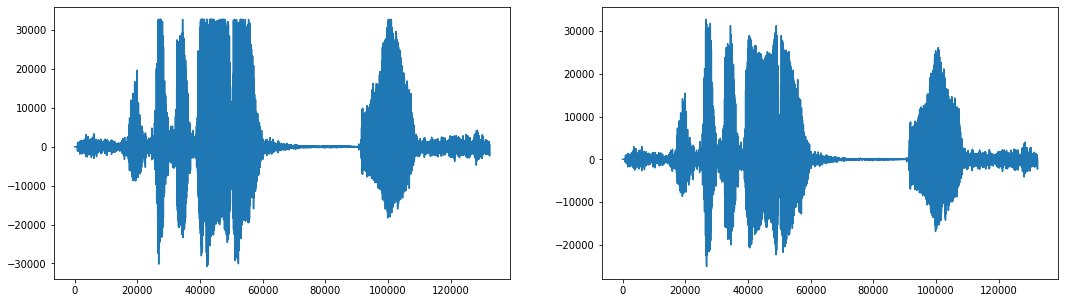

In [3]:
b, a = signal.butter(3, 1/24)
data_filtered = signal.filtfilt(b, a, data)
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(data)
plt.subplot(1,2,2)
plt.plot(data_filtered)

In [4]:
# Creating array with format required by pydub ['h', list()]
data_lowpass = array.array('h')
data_lowpass.fromlist(list(map(int,data_filtered)))
audio_lowpass = audio._spawn(data=data_lowpass)

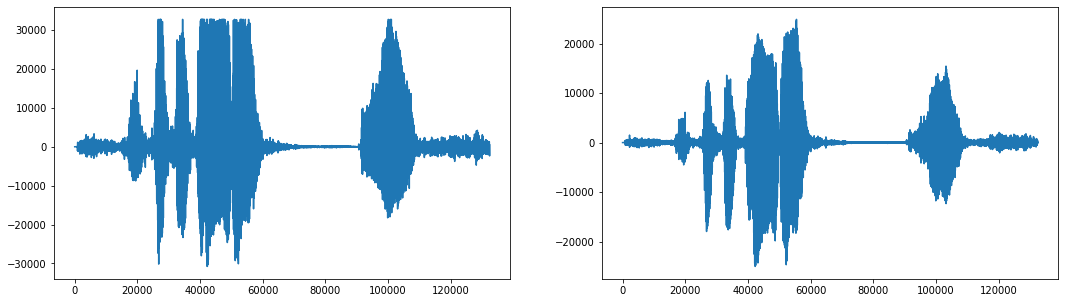

In [5]:
b, a = signal.butter(3, 1/35, btype='highpass')
data_filtered_high = signal.filtfilt(b, a, data)
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(data)
plt.subplot(1,2,2)
plt.plot(data_filtered_high)

In [6]:
data_highpass = array.array('h')
data_highpass.fromlist(list(map(int,data_filtered_high)))
audio_highpass = audio._spawn(data=data_highpass)

In [7]:
# The three audios for comparison:

In [8]:
# Original
audio

In [9]:
# Low Pass Filter
audio_lowpass

In [10]:
# High Pass Filter
audio_highpass

In [11]:
# Exporting new audio files
audio_lowpass.export('rocio_lowpass.ogg',format='ogg')
audio_highpass.export('rocio_highpass.ogg',format='ogg')

<_io.BufferedRandom name='rocio_highpass.ogg'>